### 1. Introduction

#### Problem statement:

https://www.kaggle.com/datasets/anmolkumar/house-price-prediction-challenge?select=test.csv&sort=votes

*This project is used to demonstrate ENSEMBLE METHODS*

**Background and Context**

Accurately predicting house prices can be a daunting task. The buyers are just not concerned about the size(square feet) of the house and there are various other factors that play a key role to decide the price of a house/property. It can be extremely difficult to figure out the right set of attributes that are contributing to understanding the buyer's behavior as such. This dataset has been collected across various property aggregators across India. We have 12 influencing factors with which we need to predict the prices as accurately as possible.

**Objective**

To accurately predict house prices based on house and location attributes

**Data Dictionary**

POSTED_BY:	Category marking who has listed the property

UNDER_CONSTRUCTION:	Under Construction or Not

RERA:	Rera approved or Not

BHK_NO:	Number of Rooms

BHK_OR_RK:	Type of property

SQUARE_FT:	Total area of the house in square feet

READY_TO_MOVE:	Category marking Ready to move or Not

RESALE:	Category marking Resale or not

ADDRESS:	Address of the property

LONGITUDE:	Longitude of the property

LATITUDE:	Latitude of the property

### 2. Import relevant libraries

In [1]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from xgboost import XGBRegressor
from sklearn.ensemble import (
    GradientBoostingRegressor,
    RandomForestRegressor,
    BaggingRegressor,
)

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder


# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# linear regression_modeling library
from sklearn.linear_model import LinearRegression

# Libraries to build decision tree regressor
from sklearn.tree import DecisionTreeRegressor

# model performance mterics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

In [2]:
!pip install openpyxl

### 3. Read in the dataset

In [3]:
# Import the dataset into the project notebook
df = pd.read_csv('train_house.csv')

In [4]:
# Create a copy 
CCC = df.copy()

### 4. Dataset Characteristics

In [5]:
# dataset sample to get a feel for the rows and columns
CCC.sample(
    25, random_state=2
)  # setting the random_state will ensure we get the same results every time

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
18295,Dealer,0,0,2,BHK,800.000,1,1,"Saket Nagar,Bhopal",23.210,77.454,20.000
13018,Dealer,0,1,3,BHK,1524.348,1,1,"Dronagiri,Maharashtra",18.960,72.820,88.900
13510,Dealer,0,0,3,BHK,1235.839,1,1,"Maheshtala,Kolkata",22.487,88.233,48.000
467,Dealer,0,1,4,BHK,3333.333,1,1,"Sector-108 Noida,Noida",28.527,77.377,250.000
5950,Dealer,0,0,3,BHK,1260.126,1,1,"Modinagar,Hapur",28.728,77.785,28.000
25805,Owner,0,0,3,BHK,1645.338,1,1,"Kolar Road,Bhopal",23.164,77.423,45.000
26247,Owner,0,0,2,BHK,1185.031,1,1,"Jahangirpura,Surat",21.170,72.830,28.500
28307,Dealer,0,0,3,BHK,2408.349,1,1,"Sector-45 Noida,Noida",28.553,77.356,180.000
13313,Builder,1,1,2,BHK,757.249,0,0,"Ravet,Lalitpur",24.690,78.419,63.200
8633,Dealer,0,0,3,BHK,1036.107,1,1,"Mansarovar,Jaipur",26.863,75.763,33.000


In [6]:
# Shape of the data
print(f"There are {CCC.shape[0]} rows and {CCC.shape[1]} columns.")  

There are 29451 rows and 12 columns.


In [7]:
# Data type of columns
CCC.dtypes

POSTED_BY                 object
UNDER_CONSTRUCTION         int64
RERA                       int64
BHK_NO.                    int64
BHK_OR_RK                 object
SQUARE_FT                float64
READY_TO_MOVE              int64
RESALE                     int64
ADDRESS                   object
LONGITUDE                float64
LATITUDE                 float64
TARGET(PRICE_IN_LACS)    float64
dtype: object

In [8]:
cols = CCC.select_dtypes(['object'])
cols.columns

Index(['POSTED_BY', 'BHK_OR_RK', 'ADDRESS'], dtype='object')

In [9]:
#converting columns of type object to category
for i in cols.columns:
    CCC[i] = CCC[i].astype('category')

In [10]:
# number of non-null values in dataset
CCC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   POSTED_BY              29451 non-null  category
 1   UNDER_CONSTRUCTION     29451 non-null  int64   
 2   RERA                   29451 non-null  int64   
 3   BHK_NO.                29451 non-null  int64   
 4   BHK_OR_RK              29451 non-null  category
 5   SQUARE_FT              29451 non-null  float64 
 6   READY_TO_MOVE          29451 non-null  int64   
 7   RESALE                 29451 non-null  int64   
 8   ADDRESS                29451 non-null  category
 9   LONGITUDE              29451 non-null  float64 
 10  LATITUDE               29451 non-null  float64 
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64 
dtypes: category(3), float64(4), int64(5)
memory usage: 2.4 MB


In [11]:
# null values in the dataset
CCC.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

*Observations*:

- This is a clean dataset with no null values

In [12]:
# basic statistics for each column (incl. mean, median, quartiles, min, max)
CCC.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
POSTED_BY,29451,3,Dealer,18291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UNDER_CONSTRUCTION,29451.000,NaN,NaN,NaN,0.180,0.384,0.000,0.000,0.000,0.000,1.000
RERA,29451.000,NaN,NaN,NaN,0.318,0.466,0.000,0.000,0.000,1.000,1.000
BHK_NO.,29451.000,NaN,NaN,NaN,2.392,0.879,1.000,2.000,2.000,3.000,20.000
BHK_OR_RK,29451,2,BHK,29427,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SQUARE_FT,29451.000,NaN,NaN,NaN,19802.170,1901334.913,3.000,900.021,1175.057,1550.688,254545454.500
READY_TO_MOVE,29451.000,NaN,NaN,NaN,0.820,0.384,0.000,1.000,1.000,1.000,1.000
RESALE,29451.000,NaN,NaN,NaN,0.930,0.256,0.000,1.000,1.000,1.000,1.000
ADDRESS,29451,6899,"Zirakpur,Chandigarh",509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LONGITUDE,29451.000,NaN,NaN,NaN,21.300,6.205,-37.713,18.453,20.750,26.901,59.913


Observations:

* Over 60% of the house listings are by dealers
* We can see that the median of the `Under_Construction` variable is lower than the mean of 0.18 and at least 75% of the attribute values are 0 indicating a somewhat skewed distribution 
* Less than 50% are RERA approved
* The median BHK is 2 bedroom which is smaller than mean 2.39 indicating a right skew in the distribution
* The mean is greater than 10x the median indicating a significant skew
* Most of the houses are ready to move as indicated by the 25th percentile value of 1.0 and a mean of 0.82
* Similarly most of the houses are marked as resale as indicated by the 25th percentile value of 1.0 and a mean of 0.93
* There are 6899 unique values of address indicating we may need to reduce the granularity for this attribute 
* There are some negative values for Latitude and Longitude that warrant a closer look
* The mean is greater than 2x of the median for the Target Price indicating a very skewed distribution

* There are over 6000 unique values of addresses but the exact location can be captured by the latitude and longitude - so we can just capture the city or state for further exploration and drop the detailed address

In [13]:
CCC["City_State"] = CCC["ADDRESS"].str.rsplit(",").str[-1] 

In [14]:
# Renaming some columns for ease of usage

CCC.rename(columns = {'LONGITUDE':'LAT'}, inplace = True)
CCC.rename(columns = {'LATITUDE':'LONG'}, inplace = True)
CCC.rename(columns = {'TARGET(PRICE_IN_LACS)':'TARGET'}, inplace = True)

In [15]:
CCC.drop("ADDRESS", axis=1, inplace=True)

In [16]:
CCC.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LAT,LONG,TARGET,City_State
0,Owner,0,0,2,BHK,1300.236,1,1,12.970,77.598,55.000,Bangalore
1,Dealer,0,0,2,BHK,1275.000,1,1,12.275,76.645,51.000,Mysore
2,Owner,0,0,2,BHK,933.160,1,1,12.778,77.632,43.000,Bangalore
3,Owner,0,1,2,BHK,929.921,1,1,28.642,77.344,62.500,Ghaziabad
4,Dealer,1,0,2,BHK,999.009,0,1,22.592,88.485,60.500,Kolkata


* There appear to be some outliers in `SQUARE_FT` and `TARGET` values. We define a new attribute `Price_sqft` = TARGET/SQUARE_FT to further explore the outliers and potentially remove some of them

In [17]:
CCC["Price_sqft"] =CCC['TARGET']/CCC['SQUARE_FT']

In [18]:
CCC[CCC["Price_sqft"] > 2]  # Price per square ft above 2 lacs is typically an anomaly

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LAT,LONG,TARGET,City_State,Price_sqft
2092,Owner,0,0,2,BHK,5.000,1,1,30.755,76.777,45.000,Chandigarh,9.000
3269,Owner,0,0,2,BHK,3.000,1,1,23.526,87.287,12.000,Hajipur,4.000
6451,Owner,0,0,2,BHK,900.000,1,1,22.541,88.338,2700.000,Kolkata,3.000
13763,Owner,0,0,2,BHK,3.986,1,1,21.214,81.677,24.900,Raipur,6.247
15152,Owner,0,0,1,BHK,10.980,1,1,21.048,75.771,27.300,Jalgaon,2.486
24528,Owner,0,0,2,BHK,9.397,1,1,22.030,88.060,32.500,Haldia,3.459
25602,Owner,0,0,1,BHK,600.001,1,1,21.017,75.567,1400.000,Jalgaon,2.333
28414,Owner,0,0,3,BHK,900.001,1,1,26.850,75.814,4200.000,Jaipur,4.667


<AxesSubplot:xlabel='Price_sqft'>

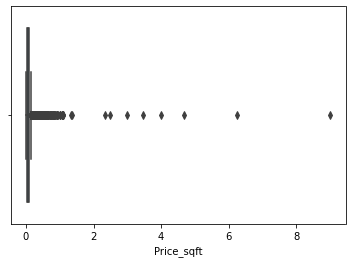

In [20]:
sns.boxplot(CCC["Price_sqft"])

### 5. Exploratory Data Analysis

In [21]:
# plotting a boxplot and histogram on same scale 

def hist_box(data, feature, figsize=(14, 8), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,) 
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="pink")  
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter") if bins else sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)  # For histogram
    ax_hist2.axvline(data[feature].mean(), color="red", linestyle="--")  # Add mean to the histogram
    ax_hist2.axvline(data[feature].median(), color="green", linestyle="-")  # Add median to the histogram

In [22]:
# create labeled barplots 
def lab_bar(data, feature, perc=False, n=None):
    total = len(data[feature])  
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))
    plt.xticks(rotation=90, fontsize=20)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  
        else:
            label = p.get_height() 
        x = p.get_x() + p.get_width() / 2  
        y = p.get_height()  
        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=14,
            xytext=(0, 5),
            textcoords="offset points",
        )  
    plt.show() 

#### Univariate Data Analysis

##### Numerical Columns

In [23]:
col_num = CCC.select_dtypes(include=[np.number]).columns.tolist()

In [24]:
col_num.remove('SQUARE_FT')

UNDER_CONSTRUCTION
RERA
BHK_NO.
READY_TO_MOVE
RESALE
LAT
LONG
TARGET
Price_sqft


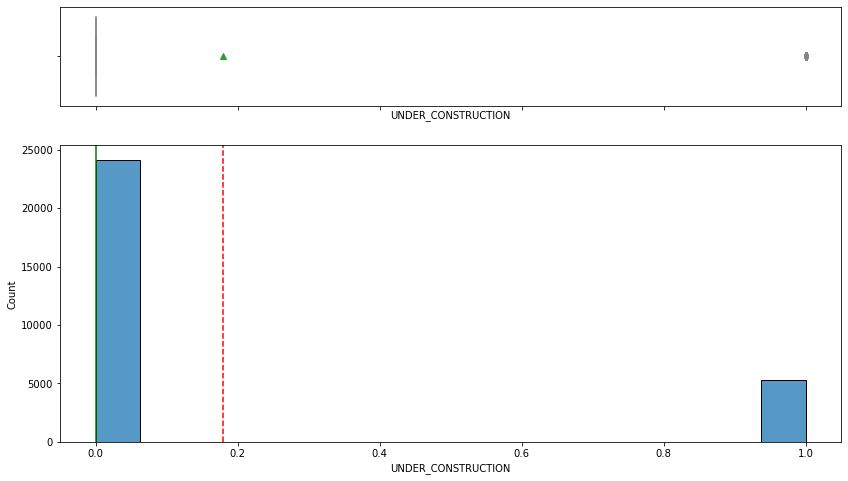

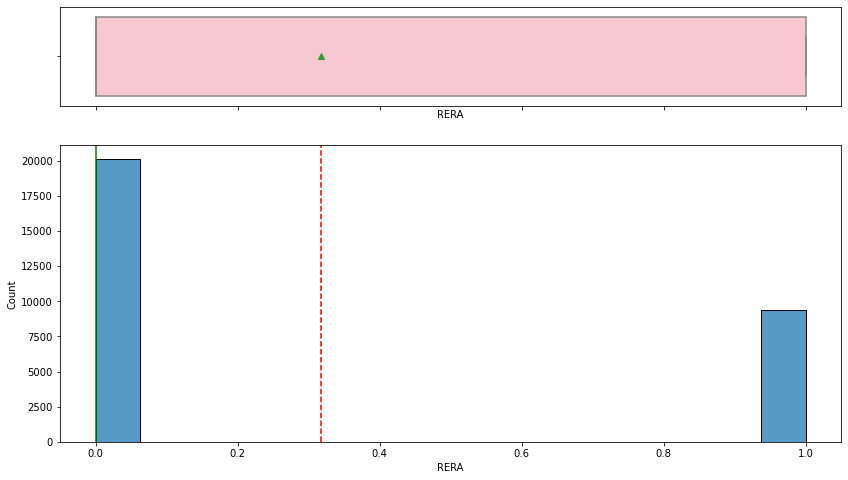

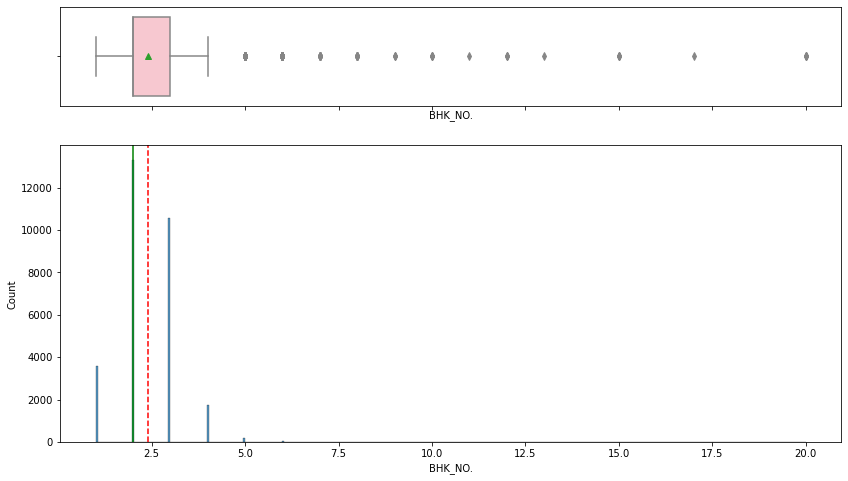

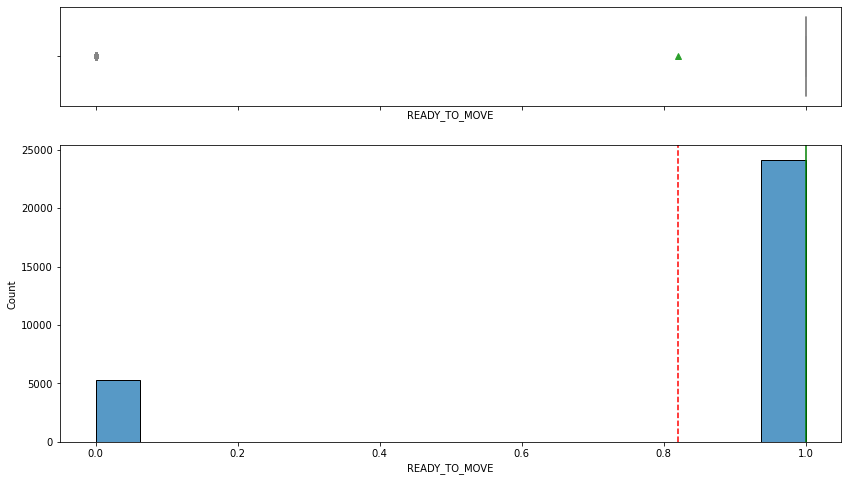

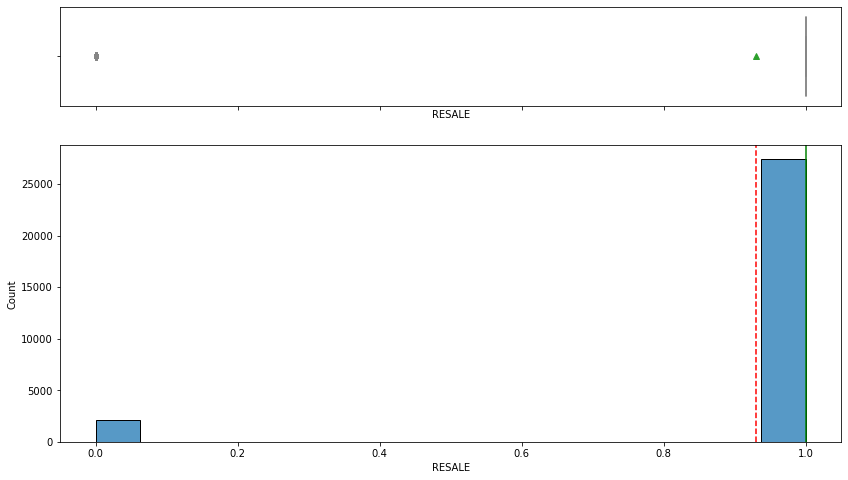

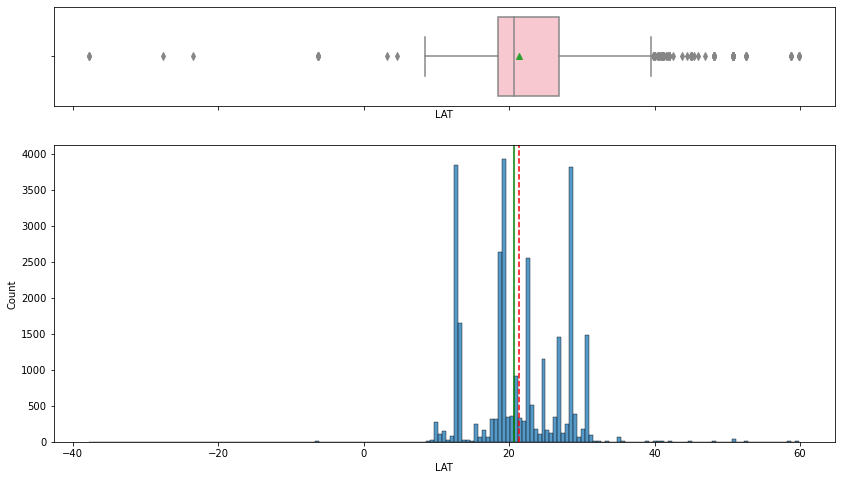

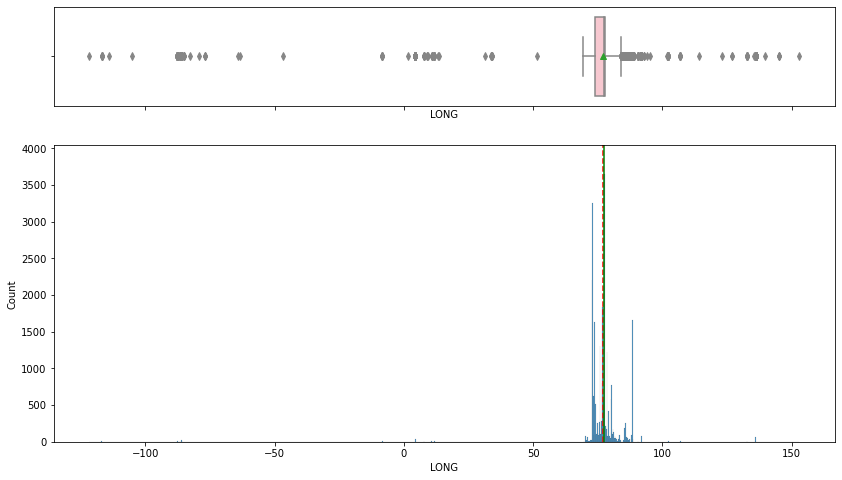

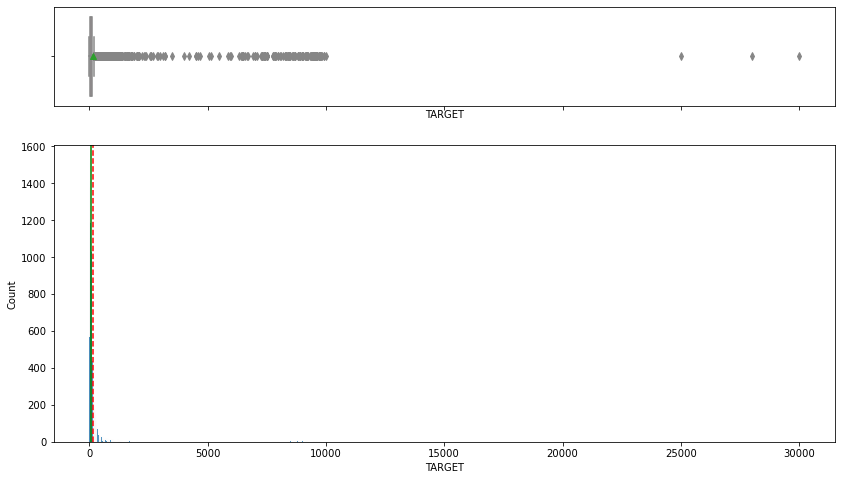

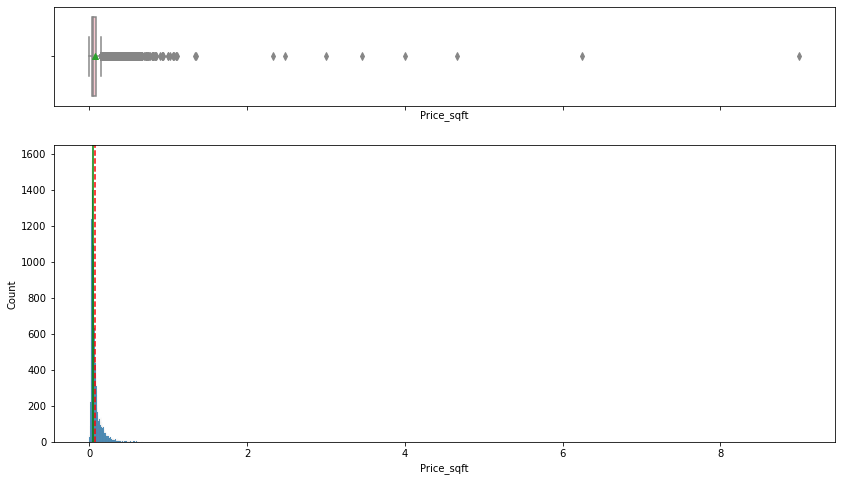

In [25]:
for col in col_num:
    hist_box(CCC, col)
    print(col)

<AxesSubplot:xlabel='SQUARE_FT'>

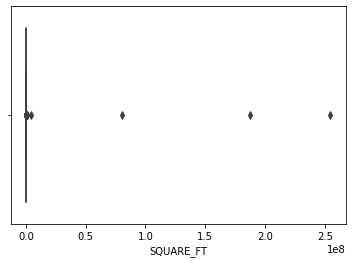

In [26]:
sns.boxplot(CCC["SQUARE_FT"])

Observations:

* Over 80% of the houses are not under construction
* About 2/3rd of the houses are RERA approved
* Most of the houses are 2 and 3 BHKs
* Over 80% of the houses are ready to move in
* Over 90% of the houses are marked as resale
* The negative values of Latitude and Longitude need to be reviewed an replaced. The Latitude and Longitude are functions of the city or state and will be accordingly adjusted based on general information about the location
* The prices are heavily right skewed with several outliers. But 75% of the prices are under 100 Lacs
* The price per square ft has several outliers many of them over 2 lacs/ square ft 
* The square ft also has many outliers (some over 50 million square ft)

#### As decision trees and ensemble methods work well on non-scaled data, I am not applying log-transforms to the skewed data

##### Categorical Columns

In [27]:
col_obj = CCC.select_dtypes(exclude=[np.number]).columns.tolist()

POSTED_BY


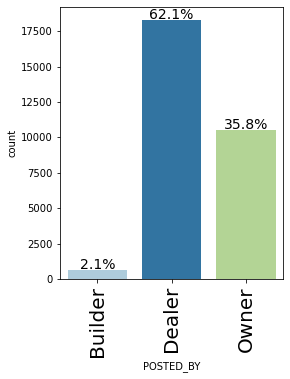

BHK_OR_RK


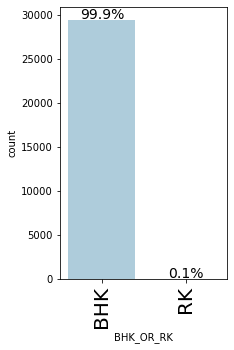

City_State


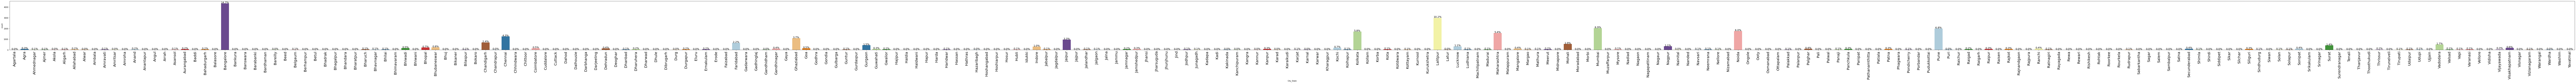

In [28]:
for col in col_obj:
    print(col)
    lab_bar(CCC, col, perc=True)

Observations:

- Around 62% of the listings are posted by dealers and ~36% by owners
- Almost all the houses are marked s BHK
- There are several cities/ states 

In [29]:
# explore how many unique attributes for each categorical variable and their associated values: 
for i in col_obj:
    print("Unique values in", i, "are :")
    print(CCC[i].value_counts())
    print("*" * 50)

Unique values in POSTED_BY are :
Dealer     18291
Owner      10538
Builder      622
Name: POSTED_BY, dtype: int64
**************************************************
Unique values in BHK_OR_RK are :
BHK    29427
RK        24
Name: BHK_OR_RK, dtype: int64
**************************************************
Unique values in City_State are :
Bangalore      4340
Lalitpur       2993
Mumbai         2023
Pune           1991
Noida          1767
               ... 
Bhadrak           1
Kurukshetra       1
Dibrugarh         1
Sagar             1
Washim            1
Name: City_State, Length: 256, dtype: int64
**************************************************


- Most of the houses are in Bangalore followed by Lalitpur, Mumbai and Pune

**Bivariate Data Analysis**

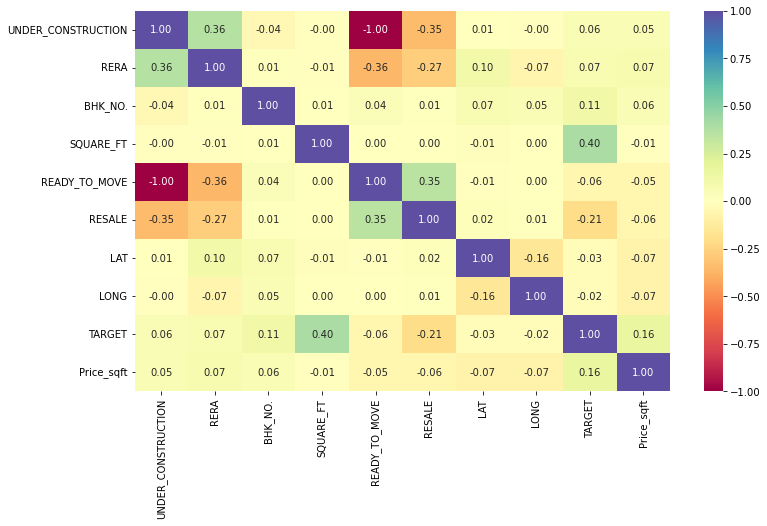

In [30]:
plt.figure(figsize=(12, 7))
sns.heatmap(CCC.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral") 
plt.show()

Observations:

- We see that there is a strong negative correlation betweem `READY_TO_MOVE` and `UNDER_CONSTRUCTION` since if the house is ready for move-in, it should not be under construction
- We also see a moderate correlation between `TARGET` and `SQUARE_FT`, which is to be expected since in most cases, the bigger the house, the higher the price

### 6. Data Processing

- We start with cleaning up Latitude and Longitude following the steps below:

1. Replace negative values for these attributes by NaN
2. For each Latitude and Longitude marked as NaN, replace the NaN with the median values of the Latitude and Longitude of the corresponding city or state. We do not split the data into training, validation and test sets before replacing NaN values since the Latitude and Logitude are tied to a geographical entity 
3. Check and remove Latitude and Longitude outliers - replace outliers with lower and upper bounds based on IQR for each city 
4. For the states, check from online sources, what are the latitude and longitude ranges and adjust the latitude and longitude values accordingly
5. We replace Price per square ft values greater than 3.5 lacs and Square ft values less than 350 with NaN and remove them as houses with these values for these attributes are outliers and are a rarity even if they exist (source: https://www.makaan.com/price-trends)
6. Check and remove Square ft and Price per square ft outliers - replace outliers with lower and upper bounds based on IQR for each city 

In [31]:
# Replace negative values of latitude by NaN
CCC.loc[~(CCC['LAT'] > 0), 'LAT']=np.nan

In [32]:
# Replace negative values of longitude by NaN
CCC.loc[~(CCC['LONG'] > 0), 'LONG']=np.nan

In [33]:
CCC.isnull().sum()

POSTED_BY              0
UNDER_CONSTRUCTION     0
RERA                   0
BHK_NO.                0
BHK_OR_RK              0
SQUARE_FT              0
READY_TO_MOVE          0
RESALE                 0
LAT                   12
LONG                  83
TARGET                 0
City_State             0
Price_sqft             0
dtype: int64

In [34]:
# Replace NaN values of Latitude with median values for each city or state 
CCC[["LAT"]] = CCC.groupby(["City_State"])[["LAT"]].transform(
    lambda x: x.fillna(x.median())
)

In [35]:
# Replace NaN values of Longitude with median values for each city or state
CCC[["LONG"]] = CCC.groupby(["City_State"])[["LONG"]].transform(
    lambda x: x.fillna(x.median())
)

In [36]:
CCC.isnull().sum()

POSTED_BY             0
UNDER_CONSTRUCTION    0
RERA                  0
BHK_NO.               0
BHK_OR_RK             0
SQUARE_FT             0
READY_TO_MOVE         0
RESALE                0
LAT                   1
LONG                  0
TARGET                0
City_State            0
Price_sqft            0
dtype: int64

In [37]:
# Drop the remaining rows with missing values of Latitude
CCC.dropna(subset=["LAT"], inplace=True)

In [38]:
CCC.isnull().sum()

POSTED_BY             0
UNDER_CONSTRUCTION    0
RERA                  0
BHK_NO.               0
BHK_OR_RK             0
SQUARE_FT             0
READY_TO_MOVE         0
RESALE                0
LAT                   0
LONG                  0
TARGET                0
City_State            0
Price_sqft            0
dtype: int64

* Let's check if the Latitudes and Latitudes are accurate taking Mumbai and Bangalore cities as an examples as they occur frequently in the dataset

In [39]:
# Mumbai example
MumLat = CCC[CCC["City_State"]=="Mumbai"].LAT
MumLong = CCC[CCC["City_State"]=="Mumbai"].LONG

<AxesSubplot:xlabel='LAT'>

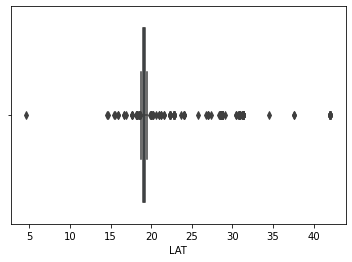

In [40]:
sns.boxplot(MumLat)

<AxesSubplot:xlabel='LONG'>

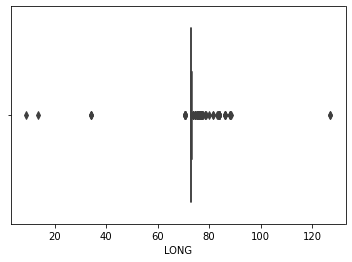

In [41]:
sns.boxplot(MumLong)

In [42]:
# Bangalore example
BlrLat = CCC[CCC["City_State"]=="Bangalore"].LAT
BlrLong = CCC[CCC["City_State"]=="Bangalore"].LONG

<AxesSubplot:xlabel='LAT'>

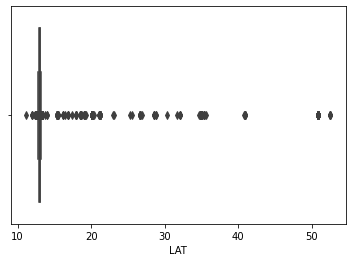

In [43]:
sns.boxplot(BlrLat)

<AxesSubplot:xlabel='LONG'>

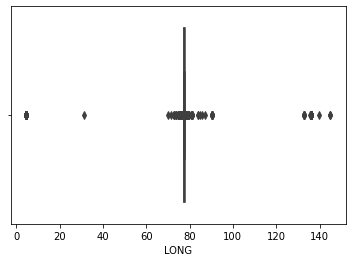

In [44]:
sns.boxplot(BlrLong)

The actual Latitudes and Longitudes of these cities are:
Mumbai: https://www.latlong.net/place/mumbai-maharashtra-india-27236.html
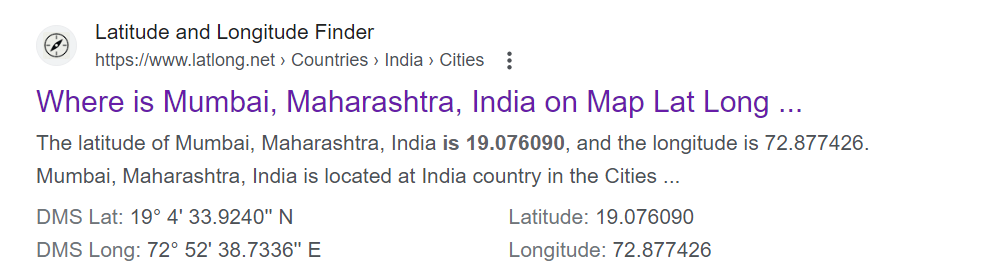

Bangalore: https://www.latlong.net/place/bengaluru-karnataka-india-499.html
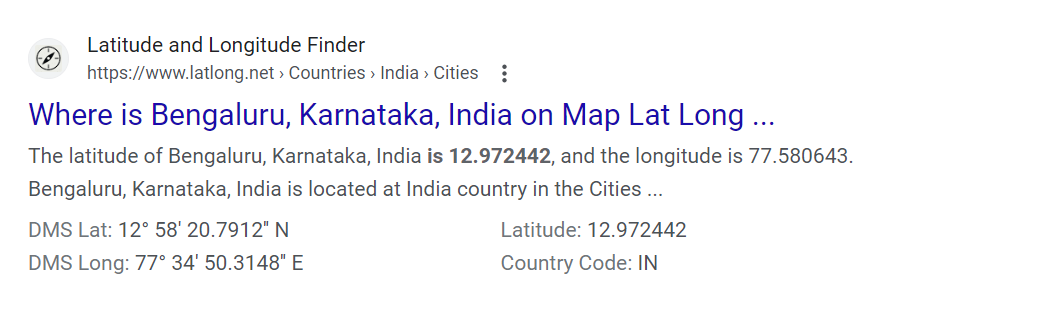

* We can see that the Latitudes and Longitudes for Mumbai and Bangalore are different from many values provided for the same in the dataset

* We remvoe outliers lower than a lower limit and higher than a higher limit set based on the IQR for each city's Latitude and Longitude

In [45]:
# treat outliers by flooring and capping

Q1_LAT = CCC.groupby(["City_State"])["LAT"].quantile(0.25)
Q3_LAT = CCC.groupby(["City_State"])["LAT"].quantile(0.75)

Q1_LONG = CCC.groupby(["City_State"])["LONG"].quantile(0.25)
Q3_LONG = CCC.groupby(["City_State"])["LONG"].quantile(0.75)

IQR_LAT = Q3_LAT - Q1_LAT
IQR_LONG = Q3_LONG - Q1_LONG

# defining new Latitude and Longitude lower and upper limits for each city and state
LO_LAT = Q1_LAT - 1.5 * IQR_LAT
UP_LAT = Q3_LAT + 1.5 * IQR_LAT

LO_LONG = Q1_LONG - 1.5 * IQR_LONG
UP_LONG = Q3_LONG + 1.5 * IQR_LONG


In [46]:
# add new Latitude lower and upper limits to the dataframe
CCC = CCC.merge(LO_LAT, on = 'City_State', how = 'inner')
CCC = CCC.merge(UP_LAT, on = 'City_State', how = 'inner')

CCC.rename(columns = {'LAT':'UP_LAT'}, inplace = True)
CCC.rename(columns = {'LAT_y':'LO_LAT'}, inplace = True)
CCC.rename(columns = {'LAT_x':'LAT'}, inplace = True)

# add new Longitude lower and upper limits to the dataframe
CCC = CCC.merge(LO_LONG, on = 'City_State', how = 'inner')
CCC = CCC.merge(UP_LONG, on = 'City_State', how = 'inner')

CCC.rename(columns = {'LONG':'UP_LONG'}, inplace = True)
CCC.rename(columns = {'LONG_y':'LO_LONG'}, inplace = True)
CCC.rename(columns = {'LONG_x':'LONG'}, inplace = True)

In [47]:
# all the values smaller than lower limit will be assigned the value of Lower limit
# all the values greater than upper limit will be assigned the value of upper limit

CCC["newLAT"] = np.clip(CCC["LAT"], CCC["LO_LAT"], CCC["UP_LAT"])
CCC["newLONG"] = np.clip(CCC["LONG"], CCC["LO_LONG"], CCC["UP_LONG"])

In [48]:
# for maharashtra state, we set Latitudes greater than 22 to a value of 22 since that is the geographical latitude upper bound for the state (https://en.wikipedia.org/wiki/Maharashtra#:~:text=Maharashtra%20with%20a%20total%20area,80%C2%B054'%20E%20longitude.)  
CCC.loc[CCC['City_State'] == 'Maharashtra', 'newLAT'] = np.clip(CCC["LAT"], CCC["LAT"], 22)

In [49]:
# we do not change the longitude range for Maharashtra
CCC.loc[CCC['City_State'] == 'Maharashtra', 'newLONG'] = CCC["LONG"]

In [50]:
# setting the values of houses smaller than 350 sq ft to NaN to be removed since such small houses are a rarity if at all they exist
CCC.loc[(CCC['SQUARE_FT'] < 350), 'SQUARE_FT']=np.nan

In [51]:
# setting the Price per sq ft of houses with price per sq ft > 3.5 lacs to NaN to be removed since such expensive houses are a rarity if at all they exist
CCC.loc[(CCC['Price_sqft'] > 3.5), 'Price_sqft']=np.nan

In [52]:
CCC.isnull().sum()

POSTED_BY               0
UNDER_CONSTRUCTION      0
RERA                    0
BHK_NO.                 0
BHK_OR_RK               0
SQUARE_FT             191
READY_TO_MOVE           0
RESALE                  0
LAT                     0
LONG                    0
TARGET                  0
City_State              0
Price_sqft              4
LO_LAT                  0
UP_LAT                  0
LO_LONG                 0
UP_LONG                 0
newLAT                  0
newLONG                 0
dtype: int64

In [53]:
# Drop the rows with NaN in the column SQUARE_FT
CCC.dropna(subset=["SQUARE_FT"], inplace=True)

In [54]:
CCC.isnull().sum()

POSTED_BY             0
UNDER_CONSTRUCTION    0
RERA                  0
BHK_NO.               0
BHK_OR_RK             0
SQUARE_FT             0
READY_TO_MOVE         0
RESALE                0
LAT                   0
LONG                  0
TARGET                0
City_State            0
Price_sqft            1
LO_LAT                0
UP_LAT                0
LO_LONG               0
UP_LONG               0
newLAT                0
newLONG               0
dtype: int64

In [55]:
# Drop the rows with NaN in the column Price_sqft
CCC.dropna(subset=["Price_sqft"], inplace=True)

In [56]:
CCC.isnull().sum()

POSTED_BY             0
UNDER_CONSTRUCTION    0
RERA                  0
BHK_NO.               0
BHK_OR_RK             0
SQUARE_FT             0
READY_TO_MOVE         0
RESALE                0
LAT                   0
LONG                  0
TARGET                0
City_State            0
Price_sqft            0
LO_LAT                0
UP_LAT                0
LO_LONG               0
UP_LONG               0
newLAT                0
newLONG               0
dtype: int64

In [57]:
# treat outliers by flooring and capping
Q1_Pricesqft = CCC.groupby(["City_State"])["Price_sqft"].quantile(0.25)
Q3_Pricesqft = CCC.groupby(["City_State"])["Price_sqft"].quantile(0.75)

Q1_SQUAREFT = CCC.groupby(["City_State"])["SQUARE_FT"].quantile(0.25)
Q3_SQUAREFT = CCC.groupby(["City_State"])["SQUARE_FT"].quantile(0.75)

IQR_Pricesqft = Q3_Pricesqft - Q1_Pricesqft
IQR_SQUAREFT = Q3_SQUAREFT - Q1_SQUAREFT

# defining new Price per square ft and square feet lower and upper limits for each city and state
LO_Pricesqft = Q1_Pricesqft - 2.5 * IQR_Pricesqft
UP_Pricesqft = Q3_Pricesqft + 2.5 * IQR_Pricesqft

LO_SQUAREFT = Q1_SQUAREFT - 2.5 * IQR_SQUAREFT
UP_SQUAREFT = Q3_SQUAREFT + 2.5 * IQR_SQUAREFT

In [58]:
# add new Price per square ft lower and upper limits to the dataframe
CCC = CCC.merge(LO_Pricesqft, on = 'City_State', how = 'inner')
CCC = CCC.merge(UP_Pricesqft, on = 'City_State', how = 'inner')

CCC.rename(columns = {'Price_sqft':'UP_Pricesqft'}, inplace = True)
CCC.rename(columns = {'Price_sqft_y':'LO_Pricesqft'}, inplace = True)
CCC.rename(columns = {'Price_sqft_x':'Price_sqft'}, inplace = True)

# add new square ft lower and upper limits to the dataframe
CCC = CCC.merge(LO_SQUAREFT, on = 'City_State', how = 'inner')
CCC = CCC.merge(UP_SQUAREFT, on = 'City_State', how = 'inner')

CCC.rename(columns = {'SQUARE_FT':'UP_SQUAREFT'}, inplace = True)
CCC.rename(columns = {'SQUARE_FT_y':'LO_SQUAREFT'}, inplace = True)
CCC.rename(columns = {'SQUARE_FT_x':'SQUARE_FT'}, inplace = True)

In [59]:
# define the outliers for Price per square ft and square ft 
outliers = CCC.loc[(CCC['Price_sqft'] < CCC['LO_Pricesqft']) | (CCC['Price_sqft'] > CCC['UP_Pricesqft']) | (CCC['SQUARE_FT'] > CCC['UP_SQUAREFT']) | (CCC['SQUARE_FT'] < CCC['LO_SQUAREFT'])]

In [60]:
# show the outliers
outliers

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LAT,LONG,TARGET,City_State,Price_sqft,LO_LAT,UP_LAT,LO_LONG,UP_LONG,newLAT,newLONG,LO_Pricesqft,UP_Pricesqft,LO_SQUAREFT,UP_SQUAREFT
37,Dealer,0,0,5,BHK,5299.955,1,1,12.917,77.592,470.000,Bangalore,0.089,12.718,13.218,77.420,77.862,12.917,77.592,-0.022,0.143,-329.155,3125.281
46,Dealer,0,0,4,BHK,4578.508,1,1,12.929,77.629,340.000,Bangalore,0.074,12.718,13.218,77.420,77.862,12.929,77.629,-0.022,0.143,-329.155,3125.281
59,Dealer,0,1,4,BHK,3621.234,1,1,12.970,77.598,470.000,Bangalore,0.130,12.718,13.218,77.420,77.862,12.970,77.598,-0.022,0.143,-329.155,3125.281
71,Dealer,1,1,4,BHK,3810.431,0,1,13.040,77.591,320.000,Bangalore,0.084,12.718,13.218,77.420,77.862,13.040,77.591,-0.022,0.143,-329.155,3125.281
75,Dealer,0,0,5,BHK,4787.552,1,1,13.040,77.591,480.000,Bangalore,0.100,12.718,13.218,77.420,77.862,13.040,77.591,-0.022,0.143,-329.155,3125.281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29161,Owner,0,0,3,BHK,1799.856,1,1,28.405,79.455,75.000,Bareilly,0.042,28.203,28.526,78.887,80.294,28.405,79.455,-0.011,0.081,820.969,1393.996
29163,Owner,1,1,2,BHK,625.000,0,1,28.475,79.430,9.500,Bareilly,0.015,28.203,28.526,78.887,80.294,28.475,79.430,-0.011,0.081,820.969,1393.996
29187,Owner,0,0,3,BHK,1200.000,1,1,23.065,88.624,24.000,Nadiad,0.020,22.611,22.848,49.239,112.254,22.848,88.624,0.009,0.038,615.699,1017.490
29196,Builder,0,1,3,BHK,1652.635,1,0,17.357,76.842,53.000,Gulbarga,0.032,17.270,17.410,76.697,77.094,17.357,76.842,0.010,0.048,584.582,1598.852


In [61]:
# estimate percent of outliers

outliers.shape[0]*100/CCC.shape[0]

5.137056531546928

* About 5% of the data is outliers, so we drop these rows

In [62]:
# drop all price per square ft and square ft outliers from the original dataframe
CCC.drop(outliers.index, axis=0, inplace=True)

#### Outlier analysis

We look at a few key features where we see many outliers: `BHK_No.`, `TARGET`, `Price_sqft`, `SQUARE_FT`

In [63]:
#Calculating top 15 values for BHK_No.
CCC['BHK_NO.'].value_counts().head(15)

2     13100
3     10073
1      3350
4      1153
5        57
6        13
8         4
7         2
9         1
11        1
10        1
Name: BHK_NO., dtype: int64

In [64]:
# BHK_No. Outlier Analysis
CCC[CCC['BHK_NO.'] >= 5]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LAT,LONG,TARGET,City_State,Price_sqft,LO_LAT,UP_LAT,LO_LONG,UP_LONG,newLAT,newLONG,LO_Pricesqft,UP_Pricesqft,LO_SQUAREFT,UP_SQUAREFT
416,Owner,0,0,8,BHK,2720.000,1,1,21.000,77.000,170.000,Bangalore,0.062,12.718,13.218,77.420,77.862,13.218,77.420,-0.022,0.143,-329.155,3125.281
564,Owner,0,0,5,BHK,2110.150,1,1,13.010,77.712,100.000,Bangalore,0.047,12.718,13.218,77.420,77.862,13.010,77.712,-0.022,0.143,-329.155,3125.281
1026,Owner,0,0,9,BHK,1313.581,1,1,13.055,77.510,180.000,Bangalore,0.137,12.718,13.218,77.420,77.862,13.055,77.510,-0.022,0.143,-329.155,3125.281
1769,Owner,0,0,5,BHK,1500.079,1,1,13.078,77.578,190.000,Bangalore,0.127,12.718,13.218,77.420,77.862,13.078,77.578,-0.022,0.143,-329.155,3125.281
2430,Dealer,1,0,5,BHK,2000.000,0,1,13.010,77.547,110.000,Bangalore,0.055,12.718,13.218,77.420,77.862,13.010,77.547,-0.022,0.143,-329.155,3125.281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29167,Owner,0,0,8,BHK,3938.462,1,1,23.524,77.806,320.000,Vidisha,0.081,23.524,23.524,77.806,77.806,23.524,77.806,0.081,0.081,3938.462,3938.462
29174,Owner,0,0,11,BHK,4000.000,1,1,28.864,74.049,55.000,Bikaner,0.014,27.337,29.084,72.749,74.251,28.864,74.049,-0.009,0.059,-903.261,6451.631
29198,Dealer,0,0,10,BHK,4356.740,1,1,21.069,86.520,85.000,Bhadrak,0.020,21.069,21.069,86.520,86.520,21.069,86.520,0.020,0.020,4356.740,4356.740
29201,Owner,0,0,8,BHK,2020.202,1,1,23.907,78.725,80.000,Sagar,0.040,23.907,23.907,78.725,78.725,23.907,78.725,0.040,0.040,2020.202,2020.202


* It appears that ~80 houses have over 5 BHK_No but with no specific pattern. We will not treat these outliers as they may represent the real market trend

In [65]:
# Price Target Outlier Analysis
CCC[CCC['TARGET'] > 750]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LAT,LONG,TARGET,City_State,Price_sqft,LO_LAT,UP_LAT,LO_LONG,UP_LONG,newLAT,newLONG,LO_Pricesqft,UP_Pricesqft,LO_SQUAREFT,UP_SQUAREFT
14380,Dealer,1,1,4,BHK,2242.794,0,1,19.063,72.856,940.000,Mumbai,0.419,18.710,19.529,72.539,73.344,19.063,72.856,-0.169,0.450,-804.896,2789.133
14536,Dealer,0,0,5,BHK,2550.062,1,1,19.103,72.824,950.000,Mumbai,0.373,18.710,19.529,72.539,73.344,19.103,72.824,-0.169,0.450,-804.896,2789.133
14664,Dealer,0,0,4,BHK,2200.021,1,1,19.125,72.894,850.000,Mumbai,0.386,18.710,19.529,72.539,73.344,19.125,72.894,-0.169,0.450,-804.896,2789.133
14877,Dealer,0,0,3,BHK,2310.030,1,1,42.049,72.945,950.000,Mumbai,0.411,18.710,19.529,72.539,73.344,19.529,72.945,-0.169,0.450,-804.896,2789.133
14888,Dealer,1,1,4,BHK,2600.005,0,1,19.059,72.900,1090.000,Mumbai,0.419,18.710,19.529,72.539,73.344,19.059,72.900,-0.169,0.450,-804.896,2789.133
14901,Dealer,0,0,4,BHK,2773.969,1,1,19.125,72.894,870.000,Mumbai,0.314,18.710,19.529,72.539,73.344,19.125,72.894,-0.169,0.450,-804.896,2789.133
15751,Dealer,0,0,4,BHK,2525.013,1,1,19.139,72.829,800.000,Mumbai,0.317,18.710,19.529,72.539,73.344,19.139,72.829,-0.169,0.450,-804.896,2789.133
15928,Dealer,0,0,4,BHK,2500.000,1,1,19.070,72.831,850.000,Mumbai,0.340,18.710,19.529,72.539,73.344,19.070,72.831,-0.169,0.450,-804.896,2789.133
16005,Dealer,0,0,3,BHK,2400.020,1,1,19.070,72.831,950.000,Mumbai,0.396,18.710,19.529,72.539,73.344,19.070,72.831,-0.169,0.450,-804.896,2789.133
17426,Dealer,0,1,4,BHK,2224.060,1,1,19.162,72.873,780.000,Lalitpur,0.351,10.808,33.020,64.621,86.698,19.162,72.873,-0.182,0.453,-836.276,2825.954


* No specific trend emerges from these Target Price outliers across other attributes. We will not treat these outliers as they may represent the real market trend

In [66]:
#Price per square ft Outlier Analysis
CCC[CCC['Price_sqft'] > 0.25]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LAT,LONG,TARGET,City_State,Price_sqft,LO_LAT,UP_LAT,LO_LONG,UP_LONG,newLAT,newLONG,LO_Pricesqft,UP_Pricesqft,LO_SQUAREFT,UP_SQUAREFT
14275,Dealer,0,1,3,BHK,1038.884,1,1,19.120,72.910,280.000,Mumbai,0.270,18.710,19.529,72.539,73.344,19.120,72.910,-0.169,0.450,-804.896,2789.133
14277,Dealer,0,1,2,BHK,1294.016,1,1,19.128,72.825,330.000,Mumbai,0.255,18.710,19.529,72.539,73.344,19.128,72.825,-0.169,0.450,-804.896,2789.133
14282,Dealer,1,0,1,BHK,448.531,0,1,19.222,73.042,120.000,Mumbai,0.268,18.710,19.529,72.539,73.344,19.222,73.042,-0.169,0.450,-804.896,2789.133
14317,Dealer,0,0,3,BHK,2070.021,1,1,19.070,72.831,690.000,Mumbai,0.333,18.710,19.529,72.539,73.344,19.070,72.831,-0.169,0.450,-804.896,2789.133
14318,Dealer,0,0,2,BHK,1273.828,1,1,16.700,76.835,570.000,Mumbai,0.447,18.710,19.529,72.539,73.344,18.710,73.344,-0.169,0.450,-804.896,2789.133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21899,Dealer,1,1,3,BHK,916.116,0,1,19.236,72.834,230.000,Maharashtra,0.251,18.606,19.592,72.503,73.404,19.236,72.834,-0.162,0.445,-876.861,2871.662
21918,Dealer,0,1,3,BHK,1728.052,1,1,19.017,72.817,510.000,Maharashtra,0.295,18.606,19.592,72.503,73.404,19.017,72.817,-0.162,0.445,-876.861,2871.662
21920,Dealer,0,0,2,BHK,800.000,1,1,19.059,72.900,310.000,Maharashtra,0.388,18.606,19.592,72.503,73.404,19.059,72.900,-0.162,0.445,-876.861,2871.662
21924,Dealer,0,0,3,BHK,2000.000,1,1,18.907,72.811,750.000,Maharashtra,0.375,18.606,19.592,72.503,73.404,18.907,72.811,-0.162,0.445,-876.861,2871.662


- The data seems reasonable from a real world standpoint and we can keep these outliers

In [67]:
#Square ft Outlier Analysis
CCC[CCC['SQUARE_FT'] >= 5000000]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LAT,LONG,TARGET,City_State,Price_sqft,LO_LAT,UP_LAT,LO_LONG,UP_LONG,newLAT,newLONG,LO_Pricesqft,UP_Pricesqft,LO_SQUAREFT,UP_SQUAREFT


- No outliers exist since they have been cleaned previously

In [68]:
# basic statistics for each column (incl. mean, median, quartiles, min, max) after outlier clean up
CCC.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
POSTED_BY,27755,3,Dealer,17083,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UNDER_CONSTRUCTION,27755.000,NaN,NaN,NaN,0.179,0.383,0.000,0.000,0.000,0.000,1.000
RERA,27755.000,NaN,NaN,NaN,0.319,0.466,0.000,0.000,0.000,1.000,1.000
BHK_NO.,27755.000,NaN,NaN,NaN,2.335,0.760,1.000,2.000,2.000,3.000,11.000
BHK_OR_RK,27755,2,BHK,27740,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SQUARE_FT,27755.000,NaN,NaN,NaN,1236.340,598.872,350.000,898.352,1151.877,1500.000,44117.647
READY_TO_MOVE,27755.000,NaN,NaN,NaN,0.821,0.383,0.000,1.000,1.000,1.000,1.000
RESALE,27755.000,NaN,NaN,NaN,0.935,0.247,0.000,1.000,1.000,1.000,1.000
LAT,27755.000,NaN,NaN,NaN,21.334,6.157,3.161,18.453,21.000,26.901,59.913
LONG,27755.000,NaN,NaN,NaN,77.319,6.237,1.555,73.814,77.335,78.001,152.963


### 7. Model Development

#### Model evaluation criterion

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.

* We will define functions to calculate adjusted $R^2$ and MAPE.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.

* We will create a function that will print out all the above metrics in one go.

In [69]:
# function to compute adjusted R-squared 
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100

# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    # predicting using the independent variables
    pred = model.predict(predictors)
    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE
    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )
    return df_perf

### 7.1 Data Preparation

In [70]:
# Drop Price Target as that will be the predicted variable
# We also drop the old Latitude and Longitude values and replace them with the new latitude and longitude values
# We drop all the temporary intermediate attributes '('LO_LAT, UP_LAT, LO_LONG, UP_LONG, LO_Pricesqft, UP_Pricesqft, LO_SQUAREFT, UP_SQUAREFT')'
# We drop the Price_sqft variable as a predictor since that already is based on the Target price
# We will finally drop the City_State variable since when the split the dataset into training and test datasets, we may not be able to guarantee that each of the datasets will have common cities or states. Furthermore, with the adjustment made to latitudes and longitudes, these can be used to predict the house prices and we do not need the names of the corresponding cities and states

X = CCC.drop(["TARGET", "LAT", "LONG", "LO_LAT", "UP_LAT", "LO_LONG", "UP_LONG", "Price_sqft", "LO_Pricesqft", "UP_Pricesqft", "LO_SQUAREFT", "UP_SQUAREFT", "City_State"], axis=1)
y = CCC["TARGET"]

In [71]:
X.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,newLAT,newLONG
0,Owner,0,0,2,BHK,1300.236,1,1,12.970,77.598
1,Owner,0,0,2,BHK,933.160,1,1,12.778,77.632
2,Dealer,0,1,2,BHK,1040.000,1,1,13.054,77.674
3,Dealer,0,0,2,BHK,1333.010,1,1,13.040,77.591
4,Owner,0,0,2,BHK,927.178,1,1,12.970,77.598


In [72]:
y.head()

0    55.000
1    43.000
2    41.600
3   110.000
4    48.000
Name: TARGET, dtype: float64

In [73]:
# Splitting data into training and test sets:
# we split data into 2 parts, training and test

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

print(X_train.shape, X_test.shape)

(22204, 10) (5551, 10)


In [74]:
# Apply one hot encoding to the categorical variables
X_train = pd.get_dummies(data=X_train, drop_first=True)
X_test = pd.get_dummies(data=X_test, drop_first=True)

In [75]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22204 entries, 23329 to 250
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   UNDER_CONSTRUCTION  22204 non-null  int64  
 1   RERA                22204 non-null  int64  
 2   BHK_NO.             22204 non-null  int64  
 3   SQUARE_FT           22204 non-null  float64
 4   READY_TO_MOVE       22204 non-null  int64  
 5   RESALE              22204 non-null  int64  
 6   newLAT              22204 non-null  float64
 7   newLONG             22204 non-null  float64
 8   POSTED_BY_Dealer    22204 non-null  uint8  
 9   POSTED_BY_Owner     22204 non-null  uint8  
 10  BHK_OR_RK_RK        22204 non-null  uint8  
dtypes: float64(3), int64(5), uint8(3)
memory usage: 1.6 MB


In [76]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5551 entries, 3113 to 10889
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   UNDER_CONSTRUCTION  5551 non-null   int64  
 1   RERA                5551 non-null   int64  
 2   BHK_NO.             5551 non-null   int64  
 3   SQUARE_FT           5551 non-null   float64
 4   READY_TO_MOVE       5551 non-null   int64  
 5   RESALE              5551 non-null   int64  
 6   newLAT              5551 non-null   float64
 7   newLONG             5551 non-null   float64
 8   POSTED_BY_Dealer    5551 non-null   uint8  
 9   POSTED_BY_Owner     5551 non-null   uint8  
 10  BHK_OR_RK_RK        5551 non-null   uint8  
dtypes: float64(3), int64(5), uint8(3)
memory usage: 406.6 KB


### 7.2 Model Building on Base Data

In [77]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Linear Regression", LinearRegression()))
models.append(("dtree", DecisionTreeRegressor(random_state=1, max_depth=10))) 
models.append(("Random Forest", RandomForestRegressor(random_state=1, max_depth=10)))   
models.append(("Bagging", BaggingRegressor(random_state=1)))
models.append(("GBM", GradientBoostingRegressor(random_state=1, max_depth=10)))
models.append(("Xgboost", XGBRegressor(random_state=1, max_depth=10))) 

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
vscore = []

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "neg_root_mean_squared_error"
# Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=5
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
    print("{}: {}".format(name, scores))
    
    
print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    vscores = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    vscore.append(vscores)
    print("{}: {}".format(name, vscores))


Cross-Validation Performance:

Linear Regression: -68.6479684862503
dtree: -41.21961310514045
Random Forest: -36.53199710255415
Bagging: -36.59079881237666
GBM: -34.10379678141455
Xgboost: -33.96665069946455

Training Performance:

Linear Regression: 67.51310462713363
dtree: 31.123530205283142
Random Forest: 28.876827368073656
Bagging: 15.308123606645395
GBM: 16.05649073370201
Xgboost: 12.572776453375885

Validation Performance:

Linear Regression: 67.27086394725174
dtree: 39.25343682392177
Random Forest: 33.979072057062496
Bagging: 33.98198321413976
GBM: 31.041312405132636
Xgboost: 32.214323680468404


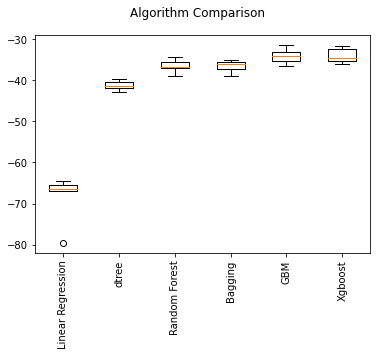

In [78]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)

plt.show()

- We can see that the Xgboost is giving the lowest root mean squared error followed by GBM when we run cross-validation on the training set with 5 subsets

In [79]:
# set up the training models for comparison across all metrics

na_tr =[]
tmp_base_tr = pd.DataFrame([])
for name, model in models:
    temp_name = model_performance_regression(model, X_train, y_train)
    tmp1 = pd.concat([tmp_base_tr, temp_name.T], axis=1)
    tmp_base_tr = tmp1
    na_tr.append(name)

In [80]:
# training performance comparison

models_train_comp_df = pd.concat([tmp_base_tr], axis=1)
models_train_comp_df.columns = na_tr

print("Training performance comparison:")

models_train_comp_df

Training performance comparison:


,Linear Regression,dtree,Random Forest,Bagging,GBM,Xgboost
RMSE,67.513,31.124,28.877,15.308,16.056,12.573
MAE,40.917,18.311,17.331,7.261,10.057,7.562
R-squared,0.327,0.857,0.877,0.965,0.962,0.977
Adj. R-squared,0.327,0.857,0.877,0.965,0.962,0.977
MAPE,69.962,30.357,29.933,12.128,17.767,13.633


- We get good performance for the Xgboost, GBM, Bagging methods but poor performance with simple linear regression which is to be expected, especially as most of the attributes have skewed distributions

In [81]:
# set up test models comparison across all metrics

na_test =[]
tmp_base_test = pd.DataFrame([])
for name, model in models:
    temp_name = model_performance_regression(model, X_test, y_test)
    tmp1 = pd.concat([tmp_base_test, temp_name.T], axis=1)
    tmp_base_test = tmp1
    na_test.append(name)

In [82]:
# test performance comparison

models_test_comp_df = pd.concat([tmp_base_test], axis=1)
models_test_comp_df.columns = na_test

print("Test performance comparison:")

models_test_comp_df

Test performance comparison:


,Linear Regression,dtree,Random Forest,Bagging,GBM,Xgboost
RMSE,67.271,39.253,33.979,33.982,31.041,32.214
MAE,40.780,21.452,19.418,17.979,16.584,16.816
R-squared,0.322,0.769,0.827,0.827,0.856,0.844
Adj. R-squared,0.320,0.769,0.827,0.827,0.855,0.844
MAPE,64.965,30.694,28.535,25.256,23.672,23.701


* We get reasonable performance for the XGBoost, GBM, Bagging methods on the test set

### 8.8 Feature importance of Gradient Boost 

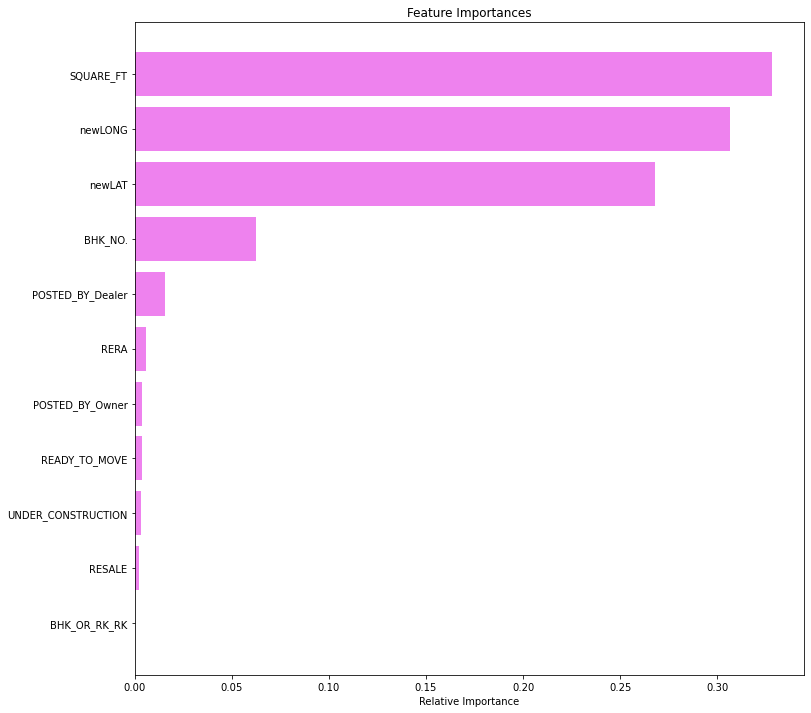

In [83]:
model = models[4][1]

feature_names = X_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- As may be expected, the most important features are Area (Square ft), Longitude, Latitude, BHK no. indicating the significance of the area of the house, the location and how many rooms in the house

#### Error Analysis

In [84]:
Err = CCC.drop(["LAT", "LONG", "LO_LAT", "UP_LAT", "LO_LONG", "UP_LONG", "Price_sqft", "LO_Pricesqft", "UP_Pricesqft", "LO_SQUAREFT", "UP_SQUAREFT"], axis=1)

In [85]:
# Extracting the rows from original data frame df where indexes are same as the test data
original_df_test = Err[Err.index.isin(X_test.index.values)].copy()

# Extracting predicted values and residuals from the final model
fitted_values = model.predict(X_test)

# Add new columns for predicted values
original_df_test["predicted price"] = fitted_values
original_df_test["difference"] = original_df_test["TARGET"] - original_df_test["predicted price"]

# Let us look at the top 50 predictions where our model made highest estimation errors (on test data)
original_df_test.sort_values(by=["difference"], ascending=False).head(50)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,TARGET,City_State,newLAT,newLONG,predicted price,difference
21129,Dealer,0,0,4,BHK,2650.021,1,1,900.000,Maharashtra,19.070,72.831,50.640,849.360
14536,Dealer,0,0,5,BHK,2550.062,1,1,950.000,Mumbai,19.103,72.824,102.982,847.018
14901,Dealer,0,0,4,BHK,2773.969,1,1,870.000,Mumbai,19.125,72.894,24.918,845.082
18506,Dealer,0,0,4,BHK,2400.045,1,1,850.000,Lalitpur,19.070,72.831,27.925,822.075
18975,Dealer,0,0,3,BHK,2500.000,1,1,800.000,Lalitpur,19.054,72.841,40.839,759.161
19548,Dealer,0,1,4,BHK,1973.761,1,1,850.000,Lalitpur,19.070,72.831,100.787,749.213
15751,Dealer,0,0,4,BHK,2525.013,1,1,800.000,Mumbai,19.139,72.829,55.544,744.456
17426,Dealer,0,1,4,BHK,2224.060,1,1,780.000,Lalitpur,19.162,72.873,61.928,718.072
20746,Dealer,0,1,4,BHK,2544.018,1,1,760.000,Maharashtra,19.120,72.910,52.216,707.784
19634,Dealer,0,0,4,BHK,1944.012,1,1,850.000,Lalitpur,19.059,72.900,144.956,705.044


In [86]:
# Extract the top 1000 line items with highest errors
t1000 = original_df_test.sort_values(by=["difference"], ascending=False).head(1000)

In [87]:
t1000["City_State"].value_counts().head(20)

Lalitpur       228
Mumbai         202
Bangalore      158
Maharashtra    124
Pune            54
Noida           48
Gurgaon         47
Kolkata         34
Mohali          18
Ghaziabad       17
Chennai         13
Kochi            7
Mangalore        5
Surat            5
Chandigarh       5
Jaipur           5
Lucknow          4
Goa              3
Ludhiana         2
Bhubaneswar      2
Name: City_State, dtype: int64

* The top cities with higher errors are the ones that appear the most in the original dataset

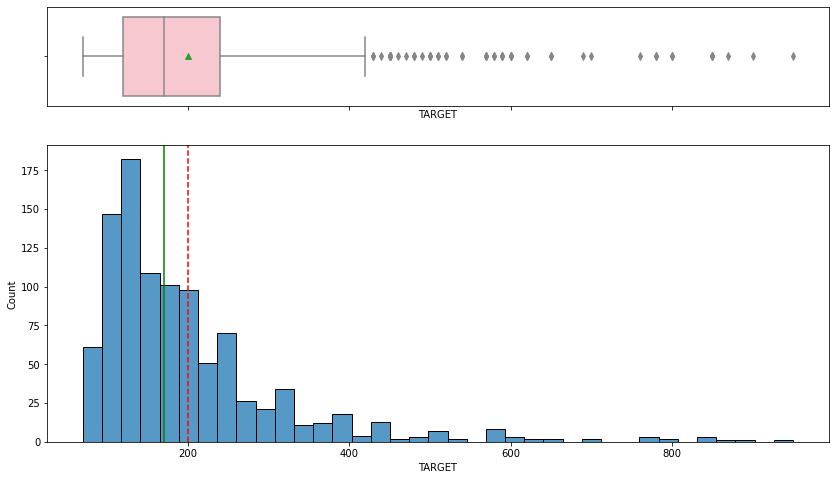

In [88]:
hist_box(t1000, "TARGET")

* The errors are not correlated to any particular target price

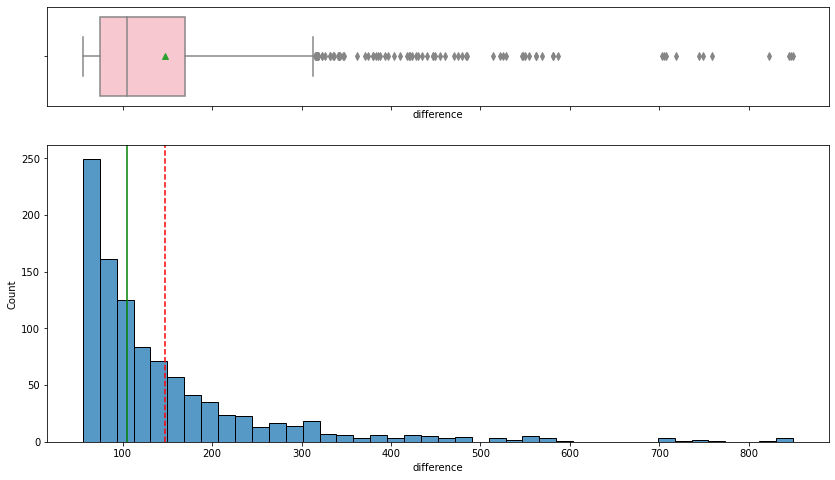

In [89]:
hist_box(t1000, "difference")

* Most of the errors are less than 200 Lacs

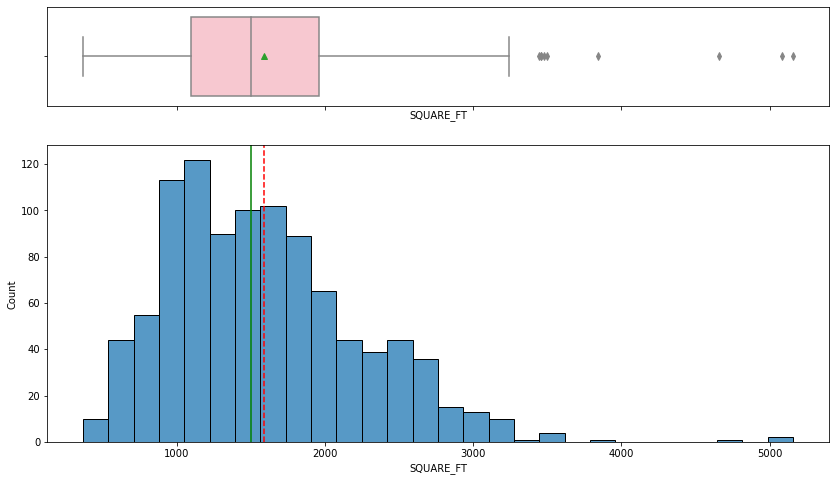

In [90]:
hist_box(t1000, "SQUARE_FT")

* There is no specific square ft where the errors are localized 

### 9. Actionable Insights

- We can use the ensemble models (esp. Gradient Boost) to predict whether the price of a house, which will allow potential home buyers to make informed choices.
    - They can screen for locations for a cheaper price
    - They can consider multiple square ft for the house to arrive at a sweet spot for price
    - The can evaluate multiple BHK no. once location and square ft are decided to optimize for their budget